In [1]:
# sckit-learn의 다양한 함수들

In [2]:
# np.unique : 데이터 안에 저장된 고유한 클래스 레이블들을 반환

In [3]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [4]:
# train_test_split: 데이터를 랜덤하게 나눔
## from sklearn.model_selection import train_test_split
## train_test_split(X, y, test_size, random_state, stratify)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [6]:
# StandardScaler : 특성 표준화에 사용
## from sklearn.preprocessing import StandardScaler
## sc.fit(X)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
# sklearn 분류 알고리즘: 대부분 OvR (one versus rest) 방식으로 다중 분류를 지원

In [9]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [10]:
# accuracy_score: 정확도 예측. 메서드와 input을 가지고 output 정확도를 예측할 수 있음

In [11]:
from sklearn.metrics import accuracy_score

print('정확도: %.2f' % accuracy_score(y_test, y_pred))
print('정확도: %.2f' % ppn.score(X_test_std, y_test))

정확도: 0.98
정확도: 0.98


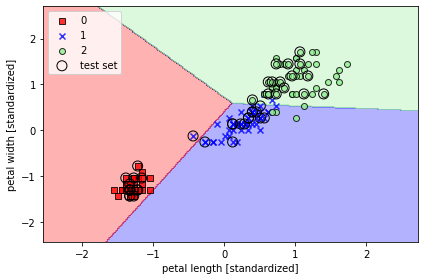

In [12]:
# 위에서 사용한 함수둘로, iris 클래스들이 잘 분류되었나 확인

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계 pltf로 표시
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 강조하기 위함
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [13]:
# logistic regression: 퍼셉트론보다 선형 이진 분류에 강력
# logit(P) = log(odds ratio) = log(P/(1-P))
# logit(P) = z = (wT)x
# P = 1/(1+e^-z) = 특정 클래스에 속할 확률 = 로지스틱 시그모이드 함수

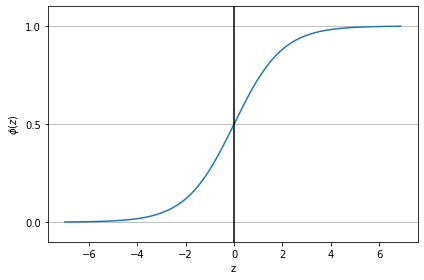

In [14]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

In [15]:
# 즉 로지스틱 회귀는 퍼셉트론 모델에서 활성화 함수가 시그모이드로 바뀐것과 동일
# : 시그마함수(z) > 시그모이드 활성화(phi_z) > 확률 예측
# 로지스틱 학습 방법: 가능도함수를 최대화 = 로그가능도함수를 최대화 = 비용함수(= -로그가능도함수) 최소화

In [16]:
class LogisticRegressionGD(object):
    # 초기화함수: 학습률, 반복횟수, 난수시드 생성
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    # 학습함수: RMS대신 로지스틱 비용함수로 cost를 계산
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
        
    # input에 w벡터를 곱한 최종입력값
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # 최종입력에 로지스틱 시그모이드를 취한값
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    # 로지스틱 시그모이드를 바탕으로 클래스 예측
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 동일함수 = return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

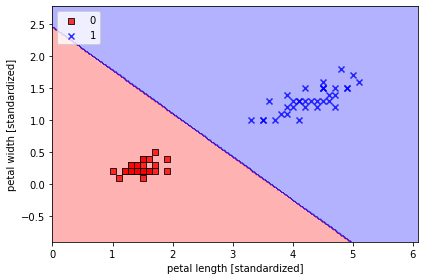

In [17]:
# 로지스틱으로 예측한 이진분류
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

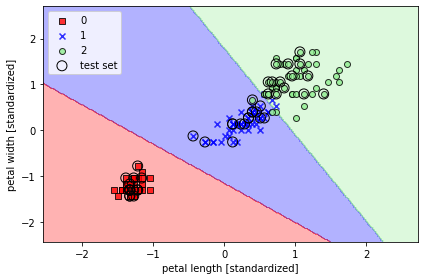

In [18]:
# 사이킷런에서 미리 구현된 로지스틱을 이용한 다중분류
# 사이킷런 input은 2차원 배열이므로, 벡터라면 np의 reshape(1,-1)을 통해 이차원으로 변환먼저 해주어야 함
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='auto', C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
# overfitting: training에서 잘 동학하나 실제 test에서는 일반화되지 않은 것
# 모델 파라미터가 너무 큰 경우 자주 나타남
# overfitting: 분산이 큰 경우 <--> underfitting: 편향이 큰 경우

# regularization: 과도한 파라미터를 제한하기 위한 추가정보 반영
# 일반적으로 L2 regularization 많이 사용 = (lamda/2)*w^2
# sklearn Logistic regression에서 parameter C: lamda의 역수값 > C를 감소시키면 정규화 강도가 커짐

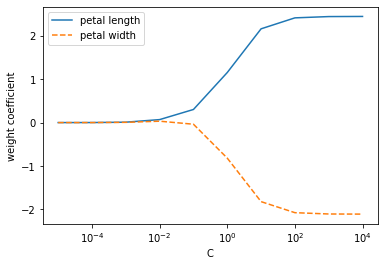

In [20]:
# c가 작아지면 = 정규화를 많이진행 = 가중치값이 작아짐

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()